# project #1 data preprocessing

## intruduction 

### Analyzing borrowers’ risk of defaulting
Your project is to prepare a report for a bank’s loan division. <br>
You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan.<br>
The bank already has some data on customers’ credit worthiness.<br>

Your report will be considered when building a credit scoring of a potential customer.<br>
A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Table of Contents
* [Setup.](#Setup)
* [Functions.](#Functions)
* [step 1. Explore the data, Open the data file and read the general information](#1)
* [Step 2.Data Preprocessing.](#2)
* [2.1 change columns names.](#2.1)
* [2.2 Preprocessing fields.](#2.2)
* [2.2.1 children.](#2.2.1)
* [2.2.2 days_employed](#2.2.2)
* [2.2.3 total_income.](#2.2.3)
* [2.2.4 age.](#2.2.4)
* [2.2.5 days_employed.](#2.2.5)
* [2.2.6 education.](#2.2.6)
* [2.2.7 purpose.](#2.2.7)
* [2.8 Drop added columns.](#2.8)
* [2.9 Are there any duplicated values?](#2.9)
* [Step 3. Answer these questions:](#3)
* [3.1 Is there a connection between having kids and repaying a loan on time?](#3.1)
* [3.2 Is there a connection between marital status and repaying a loan on time?](#3.2)
* [3.3 Is there a connection between income level and repaying a loan on time?](#3.3)
* [3.4 How do different loan purposes affect on-time loan repayment?](#3.4)
* [Step 4. Write an overall conclusion.](#4)

### Setup.<a class="anchor" id="Setup"></a>

In [1]:
import pandas as pd #working with tables
import matplotlib.pyplot as plt

from nltk.stem import SnowballStemmer #stemming 
english_stemmer = SnowballStemmer('english') #stemming for english


pd.options.display.max_columns = None

pd.options.display.max_colwidth = 200

pd.options.display.float_format = "{:,.2f}".format



### Functions.<a class="anchor" id="Functions"></a>

In [2]:
def df_info(df):
    '''
    show information regarding the DF.
    '''    
    display(df.head())
    print('shape:', df.shape)
    print()
    print('******** info() ********')
    print(df.info())
    print()
    print('******** info(memory_usage) ********')
    print(df.info(memory_usage = 'deep'))
    print()
    print('******** describe() ********')
    print(df.describe())
    print()
    print('******** describe(include) ********')
    print(df.describe(include = ['object']))

In [3]:
def histogram_range(df, col, title, xlable, ylable, range_low, range_high):
    '''
    print a historgram with range
    '''
    plt.figure(figsize=(15, 5))
    plt.hist(df[col], range = (range_low, range_high)) 

    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show() 

In [4]:
def histogram(df,col, title, xlable, ylable):
    '''
    print a historgram
    '''
    plt.figure(figsize=(15, 5))
    plt.hist(df[col]) 

    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show() 

In [5]:
def update_age_by_days_employed_years(row):
    '''
    For those rows with a value of 0 for age,
    we will use their days of employment as a base line,
    and we will add to that number 18 years.
    '''
    age = row['age']
    days_employed_years = row['days_employed_years']
    
    if age == 0:
        return (days_employed_years + 18)
    return age


In [6]:
def days_employed_years(days):
    '''
    calculate days_employed by years
    '''
    return int(days / 365)


In [7]:
def update_flag_retiree(row):
    '''
    flag rows with age over 120
    '''    
    age = row['age']
    income_type = row['income_type']
    
    if age > 120 and income_type == 'retiree':
        return 1
    return 0


In [8]:
def update_age_retiree (row):
    '''
    for age over 120, update age to 67
    '''
    age = row['age']
    flag_retiree = row['flag_retiree']
    
    if flag_retiree == 1:
        return 67
    return age


In [9]:
def update_days_employed_years_retiree (row):
    '''
    for age over 120, update days_employed_years to 49
    '''
    days_employed_years = row['days_employed_years']
    flag_retiree = row['flag_retiree']
    
    if flag_retiree == 1:
        return 49
    return days_employed_years


In [10]:
def update_days_employed_retiree (row):
    '''
    for age over 120, update days_employed to 17885
    '''    
    days_employed = row['days_employed']
    flag_retiree = row['flag_retiree']
    
    if flag_retiree == 1:
        return 17885
    return days_employed


In [11]:
def update_days_employed_by_age(row):
    '''
    calculate days_employed by age
    '''
    age = row['age']
    days_employed = row['days_employed']
    days_employed_years = row['days_employed_years']
    
    if days_employed_years > 100:
        return ((age - 18) * 365)
    
    return days_employed


In [12]:
def update_days_employed_years_by_age(row):
    '''
    calculate days_employed_years by age
    '''
    age = row['age']
    days_employed_years = row['days_employed_years']
    
    if days_employed_years > 100:
        return (age - 18)
    
    return days_employed_years


In [13]:
def find_words(row):
    '''
    sort the values from purpose into 4 categories: 
    real estate
    car
    education
    wedding
    '''
    purpose = row['purpose']
    
    stemmed_query = english_stemmer.stem(purpose)
    
    if 'real est' in stemmed_query:
        return 'real estate'
    if 'hous' in stemmed_query:
        return 'real estate'
    if 'properti' in stemmed_query:
        return 'real estate'
    if 'property' in stemmed_query:
        return 'real estate'
    
    if 'educ' in stemmed_query:
        return 'education'
    if 'univers' in stemmed_query:
        return 'education'

    if 'car' in stemmed_query:
        return 'car'

    if 'wed' in stemmed_query:
        return 'wedding'
    
    
    return stemmed_query

In [14]:
def calculate_debt_percent(row):
    '''
    calculate the % of those with debt
    '''
    no_debt = row[0]
    with_debt = row[1]
    
    total = no_debt + with_debt
    percent =  100 * (with_debt / total)
    return percent
    

### step 1. Explore the data, Open the data file and read the general information<a class="anchor" id="1"></a>

In [15]:
credit_scoring = pd.read_csv('credit_scoring_eng.csv')

In [16]:
df_info(credit_scoring)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,"-8,437.67",42,bachelor's degree,0,married,0,F,employee,0,"40,620.10",purchase of the house
1,1,"-4,024.80",36,secondary education,1,married,0,F,employee,0,"17,932.80",car purchase
2,0,"-5,623.42",33,Secondary Education,1,married,0,M,employee,0,"23,341.75",purchase of the house
3,3,"-4,124.75",32,secondary education,1,married,0,M,employee,0,"42,820.57",supplementary education
4,0,"340,266.07",53,secondary education,1,civil partnership,1,F,retiree,0,"25,378.57",to have a wedding


shape: (21525, 12)

******** info() ********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None

******** info(memory_usage) ********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data co

Conclusions:<br>
- There are 21525 rows. And 12 columns.<br>
- days_employed: has some missing and negative values, this need to be corrected. <br>Also, since there are some big numbers, there is no point using a float. <br>Will be changed into int.<br>
- education, family_status, income_type, purpose: need to look into these fields for duplications.<br>
- total_income: , since there are some big numbers, there is no point using a float. <br>Will be changed into int.


### Step 2.Data Preprocessing.<a class="anchor" id="2"></a>

### 2.1 change columns names.<a class="anchor" id="2.1"></a>

change dob_years to: age

In [17]:
name_columns = credit_scoring.columns

In [18]:
name_columns = name_columns.values.tolist()

In [19]:
name_columns[2] = 'age'

In [20]:
credit_scoring.columns = name_columns

### 2.2 Preprocessing fields.<a class="anchor" id="2.2"></a>

### 2.2.1 children.<a class="anchor" id="2.2.1"></a>

In [21]:
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Conclusions:<br>
There are 4818 rows with 1 child. It is the biggest groups among those with children. <br>
So we will consider the number -1 to be a typo and replace it with 1.


In [22]:
credit_scoring.loc[credit_scoring['children'] == -1, 'children'] = 1

What is the average number of children ?

In [23]:
credit_scoring[credit_scoring['children'] > 0]['children'].mean()

1.585412147505423

What is the average age of people with 20 children ?

In [24]:
credit_scoring[credit_scoring['children'] == 20]['age'].mean()

41.81578947368421

Because there is a jump from having 5 children to 20. <br>
And having the average age 41, and the average number of children is 1.5, which is actually closer to 2.<br>
We will consider the number 20 to be a typo, and change it with 2.


In [25]:
credit_scoring.loc[credit_scoring['children'] == 20, 'children'] = 2

In [26]:
credit_scoring['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### 2.2.2 days_employed<a class="anchor" id="2.2.2"></a>

There are negative values for days employed, <br>
we will consider it a typo and change it to positive.

In [27]:
credit_scoring['days_employed'] = credit_scoring['days_employed'].abs()

missing values for days_employed

In [28]:
credit_scoring[credit_scoring['days_employed'].isnull()]['children'].count()

2174

we will consider a missing value as a 0

In [29]:
credit_scoring['days_employed'].fillna(0, inplace = True)

### 2.2.3 total_income.<a class="anchor" id="2.2.3"></a>

are there rows with missing value income ?

In [30]:
credit_scoring[credit_scoring['total_income'].isnull()]['children'].count()

2174

we will consider a missing value as a 0

In [31]:
credit_scoring['total_income'].fillna(0, inplace = True)

Data type replacement.

In [32]:
credit_scoring['total_income'] = credit_scoring['total_income'].astype('int')

### 2.2.4 age.<a class="anchor" id="2.2.4"></a>

the min value for age is 0. <br>
how many rows have this value ?

In [33]:
credit_scoring[credit_scoring['age'] == 0]['children'].count()

101

For those rows with a value of 0 for age, <br>
we will use their days of employment as a base line,<br>
and we will add to that number 18 years.

calculate days_employed by years

In [34]:
credit_scoring['days_employed_years'] = credit_scoring['days_employed'].apply(days_employed_years)

In [35]:
credit_scoring['age'] = credit_scoring.apply(update_age_by_days_employed_years, axis = 1)

lets look at the distribution of age:

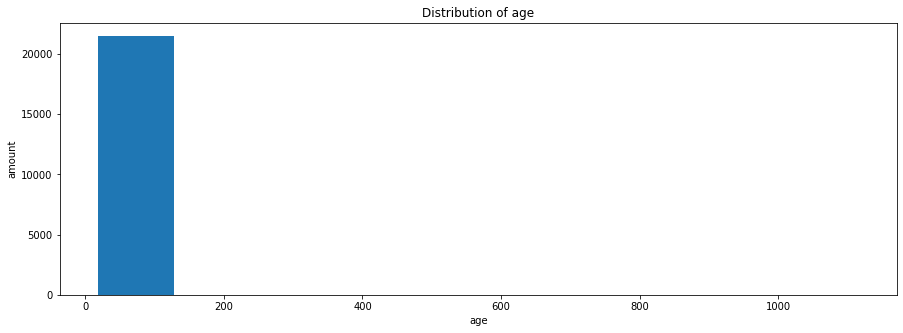

In [36]:
histogram(credit_scoring,'age', 'Distribution of age', 'age', 'amount')

lets look at rows with age above 120:

In [37]:
credit_scoring[credit_scoring['age'] > 120]['age'].head()

99       967
578     1108
1175    1034
1898    1032
4922     939
Name: age, dtype: int64

In [38]:
credit_scoring[credit_scoring['age'] > 120]['children'].count()

17

Conclusions: <br>
There are 17 rows with an age greater then 120.<br>
all of the rows with age greater then 120 have an income_type of retiree .<br>
so we will conclude that the age is a typo.<br>
So we will change the age for all of them to 67, <br>
and will also change days_employed_years to 49 and days_employed to 17885 .


In [39]:
credit_scoring['flag_retiree'] = credit_scoring.apply(update_flag_retiree, axis = 1)

In [40]:
credit_scoring['age'] = credit_scoring.apply(update_age_retiree, axis = 1)

In [41]:
credit_scoring['days_employed_years'] = credit_scoring.apply(update_days_employed_years_retiree, axis = 1)

In [42]:
credit_scoring['days_employed'] = credit_scoring.apply(update_days_employed_retiree, axis = 1)

lets look again at the distribution of age:

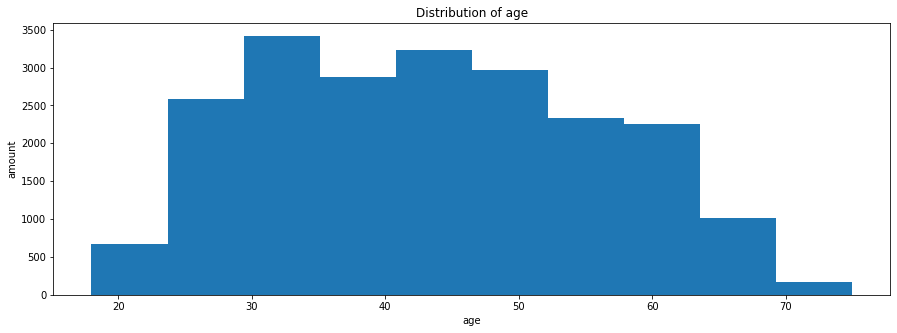

In [43]:
histogram(credit_scoring,'age', 'Distribution of age', 'age', 'amount')

what is the min age ?

In [44]:
credit_scoring['age'].min()

18

### 2.2.5 days_employed.<a class="anchor" id="2.2.5"></a>

lets look at the distribution of days_employed_years:

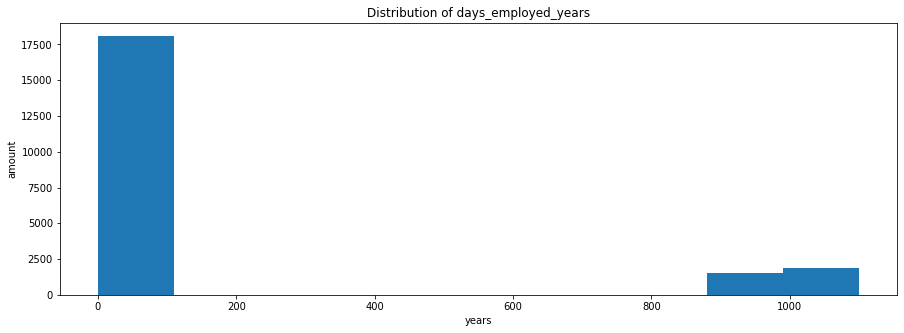

In [45]:
histogram(credit_scoring,'days_employed_years', 'Distribution of days_employed_years', 'years', 'amount')

lets look at rows with days_employed_years above 100:

In [46]:
credit_scoring[credit_scoring['days_employed_years'] > 100][['days_employed', 'age', 'days_employed_years']].head()

,days_employed,age,days_employed_years
4,"340,266.07",53,932
18,"400,281.14",53,1096
24,"338,551.95",57,927
25,"363,548.49",67,996
30,"335,581.67",62,919


In [47]:
credit_scoring[credit_scoring['days_employed_years'] > 100]['children'].count()

3428

Conclusions: <br>
There are 3428 rows with a value of more than 100 years of employment.<br>
We will calculate those values to (age - 18).<br>
Accordingly, we will also change the value for days_employed.


In [48]:
credit_scoring['days_employed'] = credit_scoring.apply(update_days_employed_by_age, axis = 1)

In [49]:
credit_scoring['days_employed_years'] = credit_scoring.apply(update_days_employed_years_by_age, axis = 1)

Data type replacement

In [50]:
credit_scoring['days_employed'] = credit_scoring['days_employed'].astype('int')

### 2.2.6 education.<a class="anchor" id="2.2.6"></a>

lets look at all the values for education

In [51]:
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

there are many duplicates in values. <br>
lets lower the case

In [52]:
credit_scoring['education'] = credit_scoring['education'].str.lower()

In [53]:
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

### 2.2.7 purpose.<a class="anchor" id="2.2.7"></a>

lets look at all the values for purpose

In [54]:
credit_scoring['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

There are many different categories. <br>
I will use Stemming to reduce them into four categories:<br>
real estate    <br>
car             <br>
education       <br>
wedding         


In [55]:
credit_scoring['steam'] = 'None'

In [56]:
credit_scoring['steam'] = credit_scoring.apply(find_words, axis = 1)

In [57]:
credit_scoring['steam'].value_counts()

real estate    10840
car             4315
education       4022
wedding         2348
Name: steam, dtype: int64

### 2.8 Drop added columns.<a class="anchor" id="2.8"></a>

In [58]:
credit_scoring.drop('flag_retiree', inplace = True, axis = 1)

### 2.9 Are there any duplicated values?<a class="anchor" id="2.9"></a>

In [59]:
credit_scoring[credit_scoring.duplicated()].head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_years,steam
2849,0,0,41,secondary education,1,married,0,F,employee,0,0,purchase of the house for my family,0,real estate
3290,0,0,58,secondary education,1,civil partnership,1,F,retiree,0,0,to have a wedding,0,wedding
4182,1,0,34,bachelor's degree,0,civil partnership,1,F,employee,0,0,wedding ceremony,0,wedding
4851,0,0,60,secondary education,1,civil partnership,1,F,retiree,0,0,wedding ceremony,0,wedding
5557,0,0,58,secondary education,1,civil partnership,1,F,retiree,0,0,to have a wedding,0,wedding


In [60]:
credit_scoring[credit_scoring.duplicated()]['children'].count()

71

Check the distribution of different values at the columns

In [61]:
for i in credit_scoring[credit_scoring.duplicated()].columns:
    print(i, ':', credit_scoring[credit_scoring.duplicated()][i].nunique())

children : 3
days_employed : 1
age : 34
education : 2
education_id : 2
family_status : 4
family_status_id : 4
gender : 2
income_type : 4
debt : 1
total_income : 1
purpose : 29
days_employed_years : 1
steam : 4


Conclusions: <br>
We can see that days_employed , total_income <br>
 Have only 1 value. And it is 0.<br>
These rows will be deleted, and this information needs to get to the developers


drop duplicates

In [62]:
credit_scoring = credit_scoring.drop_duplicates()

In [63]:
credit_scoring.shape

(21454, 14)

In [64]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   children             21454 non-null  int64 
 1   days_employed        21454 non-null  int32 
 2   age                  21454 non-null  int64 
 3   education            21454 non-null  object
 4   education_id         21454 non-null  int64 
 5   family_status        21454 non-null  object
 6   family_status_id     21454 non-null  int64 
 7   gender               21454 non-null  object
 8   income_type          21454 non-null  object
 9   debt                 21454 non-null  int64 
 10  total_income         21454 non-null  int32 
 11  purpose              21454 non-null  object
 12  days_employed_years  21454 non-null  int64 
 13  steam                21454 non-null  object
dtypes: int32(2), int64(6), object(6)
memory usage: 2.3+ MB


Conclusions: <br>
Initially there were 21525 rows.<br>
After preprocessing there are now 21454 rows.<br>
We have lost less then 1% of the data.

### Step 3. Answer these questions:<a class="anchor" id="3"></a>

### 3.1 Is there a connection between having kids and repaying a loan on time?<a class="anchor" id="3.1"></a>

In [65]:
debt = credit_scoring.pivot_table(index = 'debt', values = 'days_employed', columns = 'children', aggfunc = 'count').fillna(0)
debt

children,0,1,2,3,4,5
debt,,,,,,
0,"13,028.00","4,410.00","1,926.00",303.00,37.00,9.00
1,"1,063.00",445.00,202.00,27.00,4.00,0.00


In [66]:
debt_t = debt.T
debt_t

debt,0,1
children,,
0,"13,028.00","1,063.00"
1,"4,410.00",445.00
2,"1,926.00",202.00
3,303.00,27.00
4,37.00,4.00
5,9.00,0.00


In [67]:
debt_t['percent'] = debt_t.apply(calculate_debt_percent, axis = 1)
debt_t

debt,0,1,percent
children,,,
0,"13,028.00","1,063.00",7.54
1,"4,410.00",445.00,9.17
2,"1,926.00",202.00,9.49
3,303.00,27.00,8.18
4,37.00,4.00,9.76
5,9.00,0.00,0.00


lets look at the income for those with 5 children

In [68]:
credit_scoring[credit_scoring['children'] == 5][['age', 'family_status', 'gender', 'total_income']]

,age,family_status,gender,total_income
3979,42,civil partnership,M,0
4397,36,married,F,26953
7866,36,married,F,7803
15822,31,married,F,12408
15916,37,married,F,41071
16211,35,civil partnership,F,20176
20452,38,married,F,34007
20837,35,married,F,32678
21156,59,married,M,43050


We can see that all of them are either married or in a civil partnership. <br>
most of them are women with an income that is close to or above average. <br>
There is no information regarding the income of the spouse.

Conclusions: <br>
From the clients without children about 7.5% have had debt. <br>
From those with 1 about 9.1% <br>
From those with 2 about 9.5% <br>
From those with 3 about 8.2% <br>
From those with 4 about 9.7% <br>
From those with 5 none are in debt. <br>
My conclusion is that yes, there is a relation between having kids <br>
and repaying a loan on time. <br>
With the exception of clients with 5 children, <br>
which I assume their household total income is high, <br>
once there are kids, the chance of failing to repay a loan is getting high.


### 3.2 Is there a connection between marital status and repaying a loan on time?<a class="anchor" id="3.2"></a>

In [69]:
status = credit_scoring.pivot_table(index = 'debt', values = 'days_employed', columns = 'family_status', aggfunc = 'count')
status

family_status,civil partnership,divorced,married,unmarried,widow / widower
debt,,,,,
0,3763,1110,11408,2536,896
1,388,85,931,274,63


In [70]:
status_t = status.T
status_t

debt,0,1
family_status,,
civil partnership,3763,388
divorced,1110,85
married,11408,931
unmarried,2536,274
widow / widower,896,63


In [71]:
status_t['percent'] = status_t.apply(calculate_debt_percent, axis = 1)
status_t

debt,0,1,percent
family_status,,,
civil partnership,3763,388,9.35
divorced,1110,85,7.11
married,11408,931,7.55
unmarried,2536,274,9.75
widow / widower,896,63,6.57


Conclusions: <br>
From the groups of people who are unmarried or are in a civil partnership <br>
There are about 9% of unpaid loans.
Yet with the married there are only 7.5% of unpaid loans.<br>
Also with the divorced it is a very similar number 7.1% <br>
And the widow which are people who used to be married the number is even lower, only 6.5%<br>
My conclusion is: <br>
there is a relation between marital status and the ability to repay a loan on time.<br>
Married people have a better chance of paying on time.

### 3.3 Is there a connection between income level and repaying a loan on time?<a class="anchor" id="3.3"></a>

lets look at the distribution on income

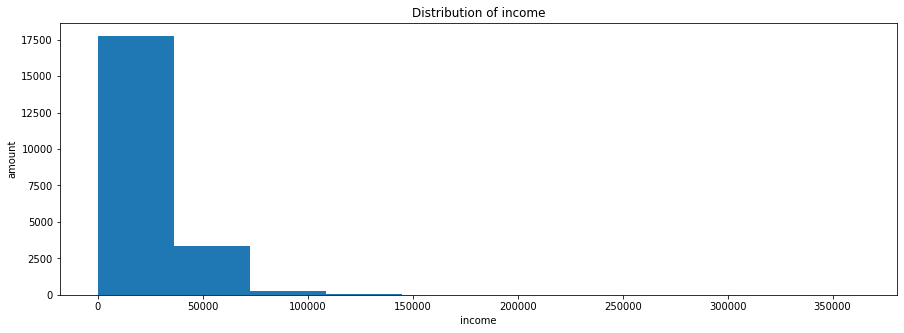

In [72]:
histogram(credit_scoring,'total_income', 'Distribution of income', 'income', 'amount')

lets look with the range of up to 100000

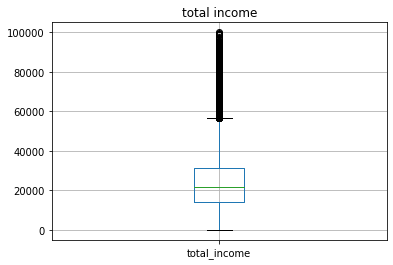

In [73]:
credit_scoring[credit_scoring['total_income'] <= 100000].boxplot(column=['total_income'])
plt.title('total income')
plt.show()

In [74]:
credit_scoring[credit_scoring['total_income'] <= 100000]['total_income'].describe()

count   21,355.00
mean    23,617.08
std     15,258.89
min          0.00
25%     14,220.50
50%     21,663.00
75%     31,175.50
max     99,944.00
Name: total_income, dtype: float64

We can see that that incomes of over 50000 are outliers.<br>
We will calculate the percentage of rows with debt for different income levels.<br>
The levels will be:<br>
0 to 15000<br>
15000 to 22000<br>
22000 to 32000<br>
32000 to 50000<br>
50000 and above.


In [75]:
def calculate_percent_by_income(low, high):    
    with_debt = credit_scoring[(credit_scoring['total_income'] >= low)\
                               & (credit_scoring['total_income'] < high ) & (credit_scoring['debt'] == 1)]['children'].count()
    no_debt = credit_scoring[(credit_scoring['total_income'] >= low) \
                             & (credit_scoring['total_income'] < high ) & (credit_scoring['debt'] == 0)]['children'].count()
    percent = 100 * with_debt / (with_debt + no_debt)
    
    print('between the range of {} and {}.'. format(low, high))
    print('there are {} clients with debt. and {} without.'. format(with_debt, no_debt))
    print('{:.2f}% have a debt'.format(percent))

lets calculate the general % of debt

In [76]:
calculate_percent_by_income(0, 500000)

between the range of 0 and 500000.
there are 1741 clients with debt. and 19713 without.
8.12% have a debt


for range: 0 to 15000

In [77]:
calculate_percent_by_income(0, 15000)

between the range of 0 and 15000.
there are 468 clients with debt. and 5378 without.
8.01% have a debt


for range: 22000 to 32000

In [78]:
calculate_percent_by_income(22000, 32000)

between the range of 22000 and 32000.
there are 487 clients with debt. and 4984 without.
8.90% have a debt


for range: 22000 to 32000

In [79]:
calculate_percent_by_income(32000, 50000)

between the range of 32000 and 50000.
there are 266 clients with debt. and 3480 without.
7.10% have a debt


for range: 50000 and avove

In [80]:
calculate_percent_by_income(50000, 500000)

between the range of 50000 and 500000.
there are 92 clients with debt. and 1228 without.
6.97% have a debt


Conclusions: <br>
We can see that for low income, below average income,<br>
around 22000, the percent of debt is above 8 %.<br>
While it is at 7.1 % at above average income, <br>
And 6.9% at incomes above 50000<br>
<br>
My conclusion is:<br>
there is a relation between income level and repaying on a loan.<br>
With lower income there is a bigger chance on defaulting on a loan


### 3.4 How do different loan purposes affect on-time loan repayment?<a class="anchor" id="3.4"></a>

Will check for each category how many took a loan, and how many were in debt.<br>
And will compare the percentage.


In [81]:
debt = credit_scoring.pivot_table(index = 'debt', values = 'days_employed', columns = 'steam', aggfunc = 'count')
debt

steam,car,education,real estate,wedding
debt,,,,
0,3903,3643,10029,2138
1,403,370,782,186


In [82]:
debt_t = debt.T
debt_t

debt,0,1
steam,,
car,3903,403
education,3643,370
real estate,10029,782
wedding,2138,186


In [83]:
debt_t['percent'] = debt_t.apply(calculate_debt_percent, axis = 1)
debt_t

debt,0,1,percent
steam,,,
car,3903,403,9.36
education,3643,370,9.22
real estate,10029,782,7.23
wedding,2138,186,8.00


Conclusions: <br>
Loan for real estate have about 7.2% cases of debt, this is the lowest value.<br>
Next comes weddings with about 8%<br>
Then education & cars with almost the same value of about 9.2%

My conclusion:<br>
is that real estate loans have a higher chance of being repaid.<br>
And that loans for cars or education have a high risk of being defaulted.


### Step 4. Write an overall conclusion.<a class="anchor" id="4"></a>

The purpose of this research is to help the loan division of the bank a build credit scoring to a potential costumer.<br>
General rule of thumb, the more children there are, <br>
the higher the chance for defaulting on a loan, About 9%<br>
With big families, those with 5 children are an exception, <br>
there are actually no reported cases with debt.<br>
Those with no children have a chance of 7.5%<br>
<br>
Clients currently or that were married in the past tend to be better at returning loans, <br>
about 7% then those who were not, about 9.5%<br>
<br>
Out of Clients with an income below the average, 22000, about 8.5% had debt.<br>
With about 7% for those with above average income.<br>
<br>
The debt on real estate loans was 7.2%, <br>
While above 9% for car or education.<br>
<br>
My recommendation:<br>
We should prefer a client who is married, with no children with above average income that would like a loan for real-estate.<br>
<br>
While we need to be careful with single clients who would like to take a loan in order to buy a car or get an education.

